# Semestre 2025-1

# Portafolio de ejercicios Análisis numérico
##### Cervantes Vasconcelos María Fernanda


# Capítulo 1

El capítulo explica los números en punto flotante, que son aquellos que las computadoras representan con un número limitado de dígitos. Se destacan los errores de redondeo que pueden ocurrir durante los cálculos, afectando los resultados dependiendo de cómo se formulen las operaciones. Además, se menciona la pérdida de significancia, que ocurre al restar números muy cercanos, lo que genera resultados imprecisos.

In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

## Ejercicio 1
Escribir un código para transformar un número natural a su representación en base 2.

In [ ]:
def basedos(n):
  p=n
  k = list()
  if n > 0:
    while n > 0:
      m = n % 2
      n = n // 2 #Saca la mitad pero como entero
      k.append(m) #Va agregando los resuidos que se obtienen a la lista k
    k.reverse() #Reescribe la lista pero empezando con el último término
    numero_base_2 = ''.join(map(str, k)) #Nos ayuda a juntar los valores de la lista pero sin las comas
    print('El número ', p , 'en base dos es ', numero_base_2)
  else:
    print("El número ingresado no es un entero positivo")


In [ ]:
basedos(2)


El número  2 en base dos es  10


## Ejercicio 2  
Escribir dos funciones en python que cálculen las siguientes sumas
$$S(k)= 1+\frac{1}{2}+\dots +\frac{1}{k-1}+\frac{1}{k}, \mbox{ y }$$
$$s(k)= \frac{1}{k}+\frac{1}{k-1}+\dots +\frac{1}{2}+1$$

Ahora iterar sobre $k$ en un rango e ir calculando los errores absolutos y relativos para cada $k$.



In [ ]:
def S_k(n):
  S = 0
  for k in range(1,n+1):
    S = S + 1/k
  return S

In [ ]:
def s_k(n):
  s = 0
  for k in range(1,n+1):
    s = s + 1/(n+1-k)
  return s

In [ ]:
for i in range(1,10):
  error_abs = abs(S_k(i)-s_k(i))
  error_re = error_abs/(S_k(i))
  print('El error absoluto para k=',i,'es de ',error_abs)
  print('El error relativo para k=',i,'es de ',error_re*100,'%\n')

El error absoluto para k= 1 es de  0.0
El error relativo para k= 1 es de  0.0 %

El error absoluto para k= 2 es de  0.0
El error relativo para k= 2 es de  0.0 %

El error absoluto para k= 3 es de  0.0
El error relativo para k= 3 es de  0.0 %

El error absoluto para k= 4 es de  0.0
El error relativo para k= 4 es de  0.0 %

El error absoluto para k= 5 es de  0.0
El error relativo para k= 5 es de  0.0 %

El error absoluto para k= 6 es de  4.440892098500626e-16
El error relativo para k= 6 es de  1.8126090197961742e-14 %

El error absoluto para k= 7 es de  0.0
El error relativo para k= 7 es de  0.0 %

El error absoluto para k= 8 es de  0.0
El error relativo para k= 8 es de  0.0 %

El error absoluto para k= 9 es de  4.440892098500626e-16
El error relativo para k= 9 es de  1.569792129081439e-14 %



## Ejercicio 3
Escribir dos funciones para cada una de las siguientes funciones:
$$f(x)=(x+1)^8$$
$$g(x)=\mbox{ El desarrollo algebraico de } f $$
Comparar los resultados evaluando sobre los intervalos
   * $[0.9, 1.1]$
   * $[0.98, 1.02]$

   Dibujarlo.

In [ ]:
def f(x):
  f = (x - 1)**8
  return f

In [ ]:
def g(x):
  g = x**8 - 8*(x**7) + 28*(x**6) - 56*(x**5) + 70*(x**4) -56*(x**3) + 28*(x**2) - 8*x +1
  return g

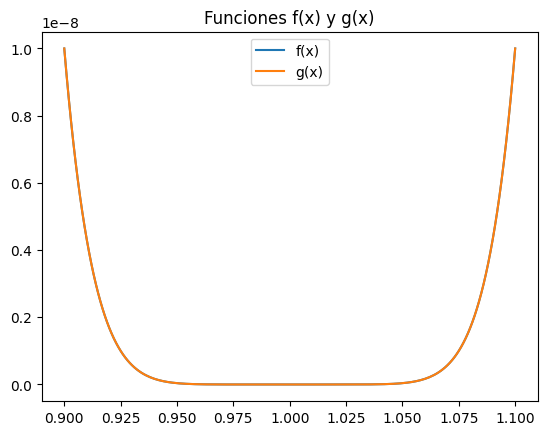

In [ ]:
# Para el intervalo [0.9 , 1.1]
intervalo1 = np.arange(0.9,1.1,0.001)

resultadof1 = [f(x) for x in intervalo1]
resultadog1 = [g(x) for x in intervalo1]

#for x in intervalo1:
  #error_abs = abs(f(x)-g(x))
  #error_re = error_abs/(f(x))
  #print('El error absoluto es de ',error_abs)
  #print('El error relativo es de ',error_re*100,'%\n')

plt.plot(intervalo1,resultadof1)
plt.plot(intervalo1,resultadog1)
plt.title("Funciones f(x) y g(x)")
plt.legend(["f(x)","g(x)"])

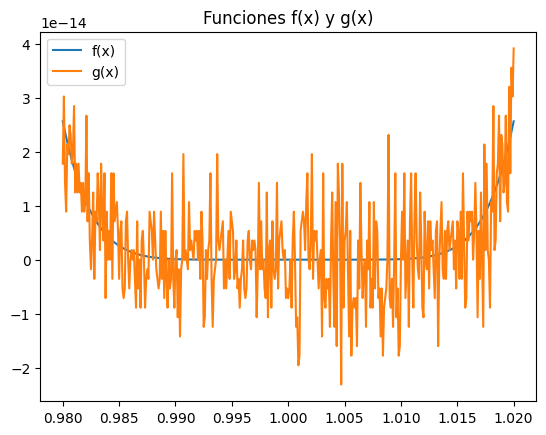

In [ ]:
# Para el intervalo [0.98 , 1.02]
intervalo2 = np.arange(0.98,1.02,0.0001)

resultadof2 = [f(x) for x in intervalo2]
resultadog2 = [g(x) for x in intervalo2]


plt.plot(intervalo2,resultadof2)
plt.plot(intervalo2,resultadog2)
plt.title("Funciones f(x) y g(x)")
plt.legend(["f(x)","g(x)"])

# Capítulo 2

En este capítulo se exploran métodos para resolver ecuaciones de la forma  $f(x) = 0 $. Estos enfoques requieren un punto inicial $ x_0$ , y se sugiere que es útil tener una idea aproximada de dónde se encuentra la solución, utilizando una gráfica como guía. Uno de los métodos tratados es el de "Bisección", el cual permite calcular cuántas iteraciones son necesarias para alcanzar un error determinado. Además, se analiza el concepto de orden de convergencia, que depende del método utilizado y determina el número de iteraciones requeridas para llegar al resultado final.

##Ejercicio 2.1

Escribir un código en python que describa el psudocódigo abajo. La implementción tiene que ser una función.

Para prueba:
- $f(x) = x^3$ y $[-1,a]$, con $a>0$.


**Psudocódigo:**

DATOS de entrada $a,b,$ $N_0$ número de interaciones, $TOL$
   - Paso 1 $i=1$;
      - $FA = f(a)$.
   - Paso 2 Mientras $i \leq N_0$ haga los pasos $3-6$.
      - Paso 3 Sea $p=a+(b-a)/2$ (calcule $p_i$); $FP = f(p).$
      - Paso 4 Si $FP = 0$ o $(b-a)/2 < TOL$ entonces
          * SALIDA ($p$).
          * PARE.
      - Paso 5 Sea $i = i +1$.
      - Paso 6 Si $FA\cdot FP > 0$ entonces determine $a= p$; (Calcule $a_i$, $b_i$.)
         - $FA = FP$
         También determine $b=p$. ($FA$ no cambia.)
   - Paso 7 SALIDA ("El método fracasó después de $N_0$ iteraciones con $N_0=$",$N_0$);
      - (El procedimiento no fue exitoso.) PARE

In [ ]:
# Definición de la función
def f(x):
  return x**3



# (a,b) es el intervalo
# N el número de iteraciones
# tol la tolerancia
# f  la función
def Bisec(f,a,b,N,tol):
  i = 1
  fa = f(a)
  while i <= N:
    p = a+(b-a)/2
    print("p = ",p)
    fp = f(p)
    print("f(p) = ",fp)
    if p**3 == 0.0  or (b-a)/2 < tol:
      print("La raíz de la ecución es ", p)
      print("Se obtuvo en la iteración ",i)
      break
    i += 1
    if fa*fp > 0:
      a = p
    elif fa*fp < 0:
      b = p

    if i == N:
      print("El método fracaso después de N iteraciones con N=",i)

In [ ]:
Bisec(f,-2,3,100,0.1)

p =  0.5
f(p) =  14837.5
p =  -0.75
f(p) =  -6910.546875
p =  -0.125
f(p) =  -3777.30712890625
p =  0.1875
f(p) =  1853.2527923583984
p =  0.03125
f(p) =  -1576.9191145896912
p =  0.109375
f(p) =  -47.222279384732246
La raíz de la ecución es  0.109375
Se obtuvo en la iteración  6


In [ ]:
def f(x):
  return 8000000*(x**12) - 45000*((1-x**12)/(x-1)*(x))

Bisec(f,0.0,0.5,100,0.01)

p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p =  0.25
f(p) =  15000.475943088531
p

##Ejercicio 2.2
- Mostrar que $g(x)=\frac{x^2-1}{3}$ tiene un único punto fijo en el intervalo $[-1,1]$.
- Hallarlo con la implementación del método de bisección (con una tolerancia de $0.00001$).
- Extra: Haga un diagrama que muestre la gráfica de $g$, la identidad $x=y$, el corte de punto fijo y la caja donde se está aplicando el teorema.


Como $g\in C[-1,1] $ y se cumple que
$Im(g)\subset [-1,1]$ ya que si $x\in[-1,1]$ entonces
$$0\le x^{2} \le 1 $$
$$-1 \le x^{2}-1 \le 0$$
$$-\frac{1}{3}\le \frac{x^{2}-1}{3} \le 0 $$

Por lo que $Im(g)=[-\frac{1}{3},0]\subset [-1,1]$ entonces $g$ tiene al menos un punto fijo.

Por otro lado $g'(x) = \frac{2x}{3}$ y esta existe en $(-1,1)$. Como $-1 < x < 1$ tendremos que $|x|<1$ y con esto tendremos que $|\frac{2x}{3}|<\frac{2}{3}$. Con esto podemos decir que $k=\frac{2}{3}$.




p =  0.0
f(p) =  -0.3333333333333333
La raíz de la ecución es  0.0
Se obtuvo en la iteración  1


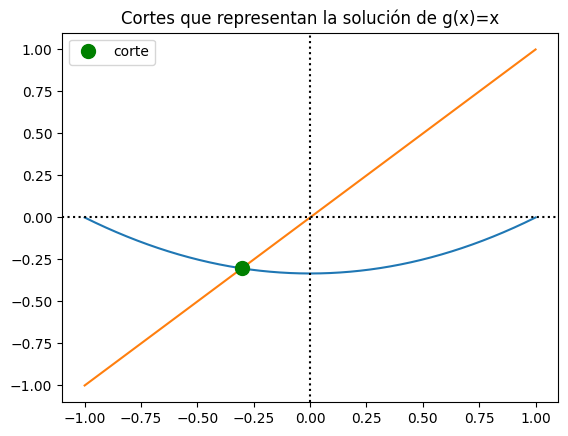

In [ ]:
# Definición de funciones

def g(x):
  return x


def f(x):
  return (x**2-1)/3

#IMPLEMENTACIÓN DE LA BISECCIÓN
# Con 100 iteraciones en el intervalo [-1,1] y una tolerancia de 0.00001

Bisec(f,-1,1,100,0.00001)

# Para el intervalo [-1,1]
intervalo2 = np.arange(-1,1,0.00001)


resultadof2 = [f(x) for x in intervalo2]
resultadog2 = [g(x) for x in intervalo2]


plt.plot(intervalo2,resultadof2)
plt.plot(intervalo2,resultadog2)
plt.title("Funciones f(x) y g(x)")
plt.legend(["f(x)","g(x)"])

plt.plot(-0.302775, ((-0.302775)**2 - 1)/3, ls = '', marker = "o",
         markersize = 10, label = "corte",
         color = 'green')

# Ejes
plt.axvline(x = 0, color = 'black', ls = ':')
plt.axhline(y = 0, color = 'black', ls = ':')

# Etiquedas y graficamos
plt.title("Cortes que representan la solución de g(x)=x")
plt.legend()
plt.show()

## Ejercicio 2.3
Construya un ejemplo de una función creciente que tenga infinitos puntos fijos sobre la recta real.

Podríamos poner a $f(x) = x$, la cuál cumple con ser función creciente y tener infinitos puntos fijos sobre la recta real.



La raíz de la ecución es  0.0
Se obtuvo en la iteración  1


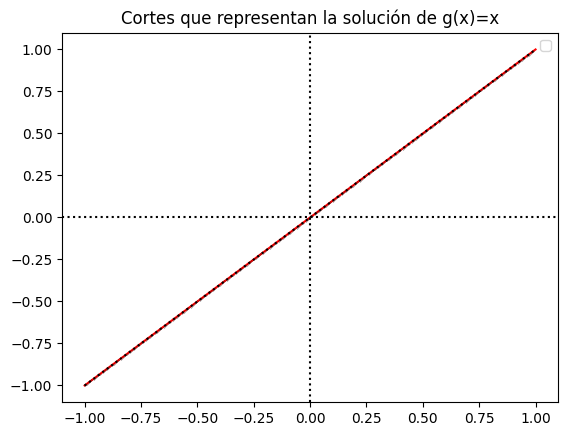

In [ ]:
# Definición de funciones

def g(x):
  return x


def f(x):
  return x

#IMPLEMENTACIÓN DE LA BISECCIÓN
# Con 100 iteraciones en el intervalo [-1,1] y una tolerancia de 0.00001

Bisec(-1,1,100,0.00001)

# Para el intervalo [-1,1]
intervalo2 = np.arange(-1,1,0.00001)
# Para el intervalo [-1,1]
intervalo1 = np.arange(-1,1,0.01)


resultadof2 = [f(x) for x in intervalo2]
resultadog2 = [g(x) for x in intervalo1]


plt.plot(intervalo2,resultadof2, markersize = 5, color = 'red')
plt.plot(intervalo1,resultadog2, ls = ':', marker = 'o',
         markersize = 0.2 , color = 'black')
plt.title("Funciones f(x) y g(x)")
plt.legend(["f(x)","g(x)"])

# Ejes
plt.axvline(x = 0, color = 'black', ls = ':')
plt.axhline(y = 0, color = 'black', ls = ':')

# Etiquedas y graficamos
plt.title("Cortes que representan la solución de g(x)=x")
plt.legend()
plt.show()

## Ejercicio 2.4
Implementar el siguiente pseudocódigo del método de **iteración de punto fijo**. La implementción tiene que ser una función.

**Pseudocódigo:**

Encontrar una solución a $p=g(p)$ dada una aproximación $p_0$.

- **ENTRADA:** aproximación inicial $p_0$, tolerancia $TOL$, número máximo de iteraciones $N_0$.

- **SALIDA:** aproximación $p$ o un mensaje de falla.

- **Paso 1**: Determine $i=1$.
- **Paso 2**: Mientras $i\leq N_0$ hacer los pasos $3-6$.
   - **Paso 3:** Calcular $p=g(p_0)$ (está calculando $p_i$).
   - **Paso 4:** Si $|p-p_0|<TOL$ entonces
      - **SALIDA:** ($p$); (Aquí termina el proceso de forma exitosa)
      - **PARAMOS**
   - **Paso 5**: Determinar $i=i+1$.
   - **Paso 6**: Determinar $p_0=p$ (Actualizamos $p_0$).
- **Paso 7:**
   - **SALIDA**: ("El método falló después de $N_0$ iteraciones, N_0=", N_0)
   - **PARAMOS**

In [ ]:
def g(p):
  return p**2

# p0 aproximación inicial
# tol tolerancia
# N número de iteraciones
# g función
def itpuntofijo(g,p0, tol, N):
  i = 1
  while i <= N:
    p = g(p0)

    if abs(p-p0) < tol:
      print("Aquí termina el proceso de forma existosa ",p)
      print("Se obtuvo en la iteración ",i)
      break

    elif i == N:
      print("El método falló después de ", N , " iteraciones")

    i += 1
    p0 = p


In [ ]:
def g(x):
  return 4*np.cos(x)

# p0 aproximación inicial
# tol tolerancia
# N número de iteraciones

itpuntofijo(g,1,10**(-6),50)


El método falló después de  50  iteraciones


## Ejercicio 2.5

Newton-Raphson

Implementar el siguiente pseudocódigo. La implementación tiene que ser una función.

**Pseudocódigo:**

Encontrar una solución a $f(x)=0$ dada una aproximación $p_0$.

- **ENTRADA:** aproximación inicial $p_0$, tolerancia $TOL$, número máximo de iteraciones $N_0$.

- **SALIDA:** solución aproximada de $p$ o un mensaje de falla.

- **Paso 1**: Determine $i=1$.
- **Paso 2**: Mientras $i\leq N_0$ hacer los pasos $3-6$.
   - **Paso 3:** Calcular $p = p_0-f(p_0)/f'(p_0)$ (está calculando $p_i$).
   - **Paso 4:** Si $|p-p_0|<TOL$ entonces
      - **SALIDA:** ($p$); (Aquí termina el proceso de forma exitosa)
      - **PARAMOS**
   - **Paso 5**: Determinar $i=i+1$.
   - **Paso 6**: Determinar $p_0=p$ (Actualizamos $p_0$).
- **Paso 7:**
   - **SALIDA**: ("El método falló después de $N_0$ iteraciones, N_0=", N_0)
   - **PARAMOS**

In [ ]:
#Función original
def k(x):
  return x

# Derivada de la función

def k_d(x):
  return x

# Código Newton-Raphson

# k es la función original y k_d es su derivada
# p0 aproximación inicial, tol tolerancia y N número de iteraciones
def NR(k,k_d, p0, tol, N):
  i = 1
  while i <= N:
    p = p0-(k(p0)/k_d(p0))

    if abs(p - p0) < tol:
      print("Aquí termina el proceso de forma exitosa con p=",p)
      print("Se obtuvo en la iteración ",i)
      break

    elif i == N:
      print("El método falló después de ", N , " iteraciones")

    i += 1
    p0 = p


## Ejercicio 2.6
Considere el problema de hallar una raíz de la función $f(x)=cos(x)-x$ usando las implementaciones de

1. Punto fijo, usando $cos(x)=x$

2. NR

1. Para punto fijo definimos a la función $g(x) = x$

In [ ]:
def g(p):
  return np.cos(p)

# p0 aproximación inicial
# tol tolerancia
# N número de iteraciones

itpuntofijo(g,0.72, 0.00001, 100)

Aquí termina el proceso de forma existosa  0.7390819499797958
Se obtuvo en la iteración  22


2. Para el método de Newton-Raphson

In [ ]:
#Función original cos(x)-x
def k(x):
  return np.cos(x)-x

# Derivada de la función -sen(x)-1

def k_d(x):
  return (np.sin(x))*(-1)-1


# p0 aproximación inicial, tol tolerancia y N número de iteraciones

NR(k,k_d,0.7, 0.00001, 3)

Aquí termina el proceso de forma exitosa con p= 0.7390851332151608
Se obtuvo en la iteración  3


## Ejercicio 2.7
Usando el método de NR aproximar, con $tol=10^{-4}$, el valor de x que nos da un punto en la gráfica de $y=x^{2}$ que es más cerca a $A(0,1)$.

Sabemos que para encontrar la distancía entre dos puntos $(x_1,x_2)$ y $(x_3,x_4)$ utilizamos la fórmula $d(x)= \sqrt{(x_3-x_1)^{2}+(x_4-x_1)^{2}}$.

En este caso tendríamos que ver la distancia entre $(0,1)$ y $(x,x^{2})$, por lo que

$$d(x)=\sqrt{(x-0)^{2}+(x^{2}-1)^{2}}=\sqrt{x^{2}+x^{4}-2x^{2}+1}=\sqrt{x^{4}-x^{2}+1}$$

Para minimizar la distancia, debemos encontrar la raíz de su derivada.

$$f(x)=\frac{1}{2}(x^{4}-x^{2}+1)^{-\frac{1}{2}}(4x^{3}-2x)=\frac{4x^{3}-2x}{2 \sqrt{x^{4}-x^{2}+1}}=0$$

Es decir cuando $4x^{3}-2x=0$

Con el método NR tendríamos

$$f(x) = 4x^{3}-2x$$
$$f'(x) = 12x^{2}-2$$


In [ ]:
#Función original
def k(x):
  return 4*(x**3)-2*x

# Derivada de la función

def k_d(x):
  return 12*(x**2)-2


# p0 aproximación inicial = 0.6
# tol tolerancia = 10^{-4}
# N número de iteraciones = 5

NR(k,k_d,0.6, 10**(-4), 5)

Aquí termina el proceso de forma exitosa con p= 0.7071067816736839
Se obtuvo en la iteración  4


Lo que nos dice es que $0.7071067816736839$ es una raíz de $4x^{3}-2x$.

Entonces la distancia es $d(x)=\sqrt{x^{4}-x^{2}+1}=\sqrt{0.7071067816736839^{4}-0.7071067816736839^{2}+1}=0.75$

Y el punto $(x,x**2)=(0.7071067816736839,0.5000000006889149)$

##Ejercicio 2.8
Implementar el pseudocódigo. La implementación tiene que ser una función.

Encontrar una solución a $f(x)=0$ dadas las aproximaciones $p_0$ y $p_1$.

- **ENTRADA:** aproximaciones iniciales $p_0$, $p_1$, tolerancia $TOL$, número máximo de iteraciones $N_0$.

- **SALIDA:** solución aproximada de $p$ o un mensaje de falla.

- **Paso 1**:
   - Determine $i=2$.
   - $q_0=f(p_0)$
   - $q_1=f(p_1)$
- **Paso 2**: Mientras $i\leq N_0$ hacer los pasos $3-6$.
   - **Paso 3:** Calcular $\displaystyle p = p_1-\frac{q_1(p_1-p_0)}{q_1-q_0}$ (está calculando $p_i$).
   - **Paso 4:** Si $|p-p_0|<TOL$ entonces
      - **SALIDA:** ($p$); (Aquí termina el proceso de forma exitosa)
      - **PARAMOS**
   - **Paso 5**: Determinar $i=i+1$.
   - **Paso 6**: Determinar (Actualizamos $p_0,q_0,p_1,q_1$)
      - $p_0=p_1$;
      - $q_0=q_1;$
      - $p_1=p;$
      - $q_1=f(p)$  
- **Paso 7:**
   - **SALIDA**: ("El método falló después de $N_0$ iteraciones, N_0=", N_0)
   - **PARAMOS**

#### **Observaciones**

1. El algoritmo necesita dos aproximaciones iniciales $p_0$ y $p_1$.
2. Cada paso, después del inicial, necesita únicamente la evaluación de la función $f$, mientras que el algoritmo $NR$ ocupa evaluar $f$ y evaluar $f'$.
3. Ojo, el punto anterior puede ser una mejora, pero tengan encuenta que ahora se realizan más operaciones básicas.

In [ ]:
# Método de la secante
# f función
# p0 aproximación inicial
# p1 segunda aproximación inicial
# tol tolerancia
# N número de iteraciones

def sec(f,p0,p1,tol,N):
  i = 2
  q0 = f(p0)
  q1 = f(p1)
  while i <= N:

    p = p1 - (q1*(p1-p0))/(q1-q0)

    if abs(p-p0) < tol:
      print("Aquí termina el proceso de forma exitosa con p=",p)
      print("Se obtuvo en la iteración ",i)
      break

    elif i == N:
      print("El método falló después de ", N , " iteraciones")

    i += 1
    p0 = p1
    q0 = q1
    p1 = p
    q1 = f(p)


In [ ]:
def k(x):
  return 4*(x**3)-2*x

# p0 aproximación inicial = 0.6
# tol tolerancia = 10^{-4}
# N número de iteraciones = 5

sec(k,0.6,0.7,10**(-4),5)


Aquí termina el proceso de forma exitosa con p= 0.707106781194647
Se obtuvo en la iteración  5


## Ejercicio 2.9
Implementar el pseudocódigo. La implementación tiene que ser una función.

Encontrar una solución a $f(x)=0$ dada la función $f$ continua en el intervalo $[p_0, p_1]$ donde $f(p_0)$ y $f(p_1)$ tiene signos opuestos.

- **ENTRADA:** aproximaciones iniciales $p_0$, $p_1$, tolerancia $TOL$, número máximo de iteraciones $N_0$.

- **SALIDA:** solución aproximada de $p$ o un mensaje de falla.

- **Paso 1**:
   - Determine $i=2$.
   - $q_0=f(p_0)$
   - $q_1=f(p_1)$
- **Paso 2**: Mientras $i\leq N_0$ hacer los pasos $3-7$.
   - **Paso 3:** Calcular $\displaystyle p = p_1-\frac{q_1(p_1-p_0)}{q_1-q_0}$ (está calculando $p_i$).
   - **Paso 4:** Si $|p-p_0|<TOL$ entonces
      - **SALIDA:** ($p$); (Aquí termina el proceso de forma exitosa)
      - **PARAMOS**
   - **Paso 5**: Determinar
      - $i=i+1$.
      - $q=f(p).$
   - **Paso 6**: Si $q\cdot q_1<0$ entonces determine:
      - $p_0=p_1.$
      - $q_0=q_1.$
   - **Paso 7**: Determinar
      - $p_1=p$
      - $q_1=q$
- **Paso 8:**
   - **SALIDA**: ("El método falló después de $N_0$ iteraciones, N_0=", N_0)
   - **PARAMOS**


In [ ]:
# Falsa posición

# f función
# (p0,p1) intervalo donde se encuentra la función
# tol tolerancia
# N número de iteraciones

def posfalsa(f,p0,p1,tol,N):
  i = 2
  q0 = f(p0)
  q1 = f(p1)

  while i <= N:

    p = p1 - (q1*(p1-p0))/(q1-q0)

    if abs(p-p0) < tol:
      print("Aquí termina el proceso de forma exitosa con p=",p)
      print("Se obtuvo en la iteración ",i)
      break

    elif i == N:
      print("El método falló después de ", N , " iteraciones")

    i += 1
    q = f(p)

    if q*q1 < 0:
      p0 = p1
      q0 = q1

    p1 = p
    q1 = q


In [ ]:
def k(x):
  return 4*(x**3)-2*x

# p0 aproximación inicial = 0.6
# tol tolerancia = 10^{-4}
# N número de iteraciones = 5

posfalsa(k,0.65,0.75,10**(-4),5)


El método falló después de  5  iteraciones


## Ejercicio 2.10
La suma de dos numeros es 20. Si cada numero se le suma su raíz, el producto de las dos sumas es 155.55. Determine los dos números con con $tol = 10^{-4}$.

Ideas:
$$ x + y =20 ⟹ y = 20 - x $$

$$(x+\sqrt{x})(y+\sqrt{y})=155.55$$

$$⟹ (x+\sqrt{x})(20 - x+\sqrt{20 - x})-155.55=0$$
Aplicar $NR$ a esta expresión:
$$f(x)= (x + \sqrt{x})(20 - x + \sqrt{20 - x}) - 155.55$$

$$f'(x)=20-2x+\sqrt{20-x}-\frac{x}{2\sqrt{20-x}}+\frac{10}{\sqrt{x}}-\frac{3\sqrt{x}}{2}+\frac{10-x}{\sqrt{20x-x^{2}}}$$

In [ ]:
#Función original
def k(x):
  return (x+np.sqrt(x))*(20-x+np.sqrt(20-x))-155.55

# Derivada de la función

def k_d(x):
  return 20 - 2*x + np.sqrt(20-x)-x/(2*np.sqrt(20-x))+10/np.sqrt(x)-(3/2)*np.sqrt(x)+10/np.sqrt(20*x-x**2)



# p0 aproximación inicial = 0.6
# tol tolerancia = 10^{-4}
# N número de iteraciones = 5

NR(k,k_d,0.6, 10**(-4), 1000)

Aquí termina el proceso de forma exitosa con p= 6.512847053133464
Se obtuvo en la iteración  7


Con esto obtenemos el valor de $x$ en el cuál $f(x)=0$, por lo que una aproximación al primer número es $x=6.512847053133464$, con esto podemos calcular a $y=20-x=20-6.512847053133464=13.487152946866537$.

Veamos que

 $(13.487152946866537+\sqrt{13.487152946866537})(6.512847053133464+\sqrt{6.512847053133464})=17.159638882423884(9.064875080631097)=155.5499828979127$

In [ ]:
NR(k,k_d,13, 10**(-4), 1000)

Aquí termina el proceso de forma exitosa con p= 13.487137442394431
Se obtuvo en la iteración  6


Con esto obtenemos el valor de $x$ en el cuál $f(x)=0$, por lo que una aproximación al primer número es $x=13.487137442394431$, con esto podemos calcular a $y=20-x=20-13.487137442394431=6.512862557605569$.

Veamos que

 $(13.487137442394431+\sqrt{13.487137442394431})(6.512862557605569+\sqrt{6.512862557605569})=17.159638882423884(9.064875080631097)=155.5501413930152$

 Como $f(x)=0$ tiene dos raíces, obtenemos dos aproximaciones muy cercanas.

Método de Newton Raphson de orden 2

Se necesitan dos derivadas

In [ ]:
import numpy as np
#Función original
def k(x):
  return x**3+2

# Primera derivada de la función

def k_d(x):
  return 3*(x**2)

# Segunda derivada de la función

def k_d2(x):
  return 6*x


# Código Newton-Raphson

# k es la función original, k_d es su primera derivada y k_d2 es su segunda derivada
# p0 aproximación inicial, tol tolerancia y N número de iteraciones
def NR2(k,k_d,k_d2 ,p0, tol, N):
  i = 1

  while i <= N:
    A = k_d(p0)/k_d2(p0)
    B = (2*k(p0)*k_d2(p0))/(k_d(p0)**2)

    if 1-B < 0:
      print("Valor negativo dentro de la raíz, último valor p0 =",p0)
      break

    p = p0-A*(1+np.sqrt(1-B))
    print(p)

    if abs(p - p0) < tol:
      print("Aquí termina el proceso de forma exitosa con p=",p)
      print("Se obtuvo en la iteración ",i)
      break

    elif i == N:
      print("El método falló después de ", N , " iteraciones")

    i += 1
    p0 = p


In [ ]:
e = 1/2**(52)
e

2.220446049250313e-16

In [ ]:
(1-e/3)-1

-1.1102230246251565e-16

In [ ]:
(1-2**(-55))-1

0.0

# Capítulo 3

En esta sección, se exploraron diversos métodos para aproximar derivadas, abordando tanto sus procedimientos como los errores de truncamiento asociados. A lo largo del análisis, comparamos los métodos con el fin de minimizar dicho error y obtener resultados más precisos. Además, se estudiaron técnicas de integración, como los métodos de cuadratura, que permiten mejorar la aproximación al dividir el área a calcular en segmentos más pequeños.

## Ejercicio 3.1
Implementar una función en python del método de diferencia hacia adelante, hacia atrás y diferencia centrada. Esta función tiene que recibir una función $f$, un paso $h$  y el punto $x_0$, además de un texto (string) que diga qué método usará.

In [ ]:
#Calcula la derivada de una función usando diferentes métodos de diferencias finitas.
# x0 punto donde se evalúa la derivada
# metodo: adelante, atras, centrada

def diferencias(f, h, x0, metodo):

  if metodo == 'adelante':
    derivada = (f(x0 + h) - f(x0)) / h
    metodo_usado = "Diferencia hacia adelante"
  elif metodo == 'atras':
    derivada = (f(x0) - f(x0 - h)) / h
    metodo_usado = "Diferencia hacia atrás"
  elif metodo == 'centrada':
    derivada = (f(x0 + h) - f(x0 - h)) / (2 * h)
    metodo_usado = "Diferencia centrada"
  else:
    derivada = None
    metodo_usado = "Método no reconocido"

  print( "El método utilizado es ",metodo_usado," el resultado es ",derivada )

In [ ]:
def f(x):
  return x

diferencias(f, 0.1, 1, "adelante")

El método utilizado es  Diferencia hacia adelante  el resultado es  1.0000000000000009


## Ejercicio 3.2
Escribir una función que calcule la aproximación vista de de la segunda derivada. Esta tiene que recibir como parámetros la función $f$, el paso $h$ y el punto $x_0$.


In [ ]:

# Calcula la segunda derivada por metodo centrado
# x0 punto donde se evalúa la segunda derivada
def segunda_derivada(f, h, x0):

  derivada = (f(x0 + h) - 2 * f(x0) + f(x0 - h)) / (h**2)
  print("La aproximación de la segunda derivada en x0 =", x0, "es:", derivada)

# Ejemplo de uso
def f(x):
  return x**3

segunda_derivada(f, 0.1, 1)

La aproximación de la segunda derivada en x0 = 1 es: 6.000000000000049


## Ejercicio 3.3
Implementar una función en python que calcule la aproximación a la integral usando el método del punto medio (la de rectángulos) que reciba los parámetros
- la fución $f$,
- el intervalo $[a,b]$ (realmente dos números),
- un string que se use para decidir qué tipo de implementación, punto medio, extremo izquierdo o extremo derecho,
y devuelva el valor de la aproximación.

In [ ]:
# Calcula la aproximación a la integral usando el método del punto medio.

def calcular_integral_punto_medio_simple(f, a, b):

    # Punto medio del intervalo
    punto_medio = (a + b) / 2

    # Aproximación de la integral
    integral_aproximada = (b - a) * f(punto_medio)

    print("Usando el método del punto medio, el resultado es:", integral_aproximada)
    return integral_aproximada


def mi_funcion(x):
    return x**2

a = 0
b = 1
calcular_integral_punto_medio_simple(mi_funcion, a, b)


Usando el método del punto medio (simple), el resultado es: 0.25


0.25

##Ejercicio 3.4
Implementar una función en python que calcule la aproximación a la integral usando el método del trapecio que recibo los parámetros
- la fución $f$,
- el intervalo $[a,b]$ (realmente dos números),
y devuelva el valor de la aproximación.


In [ ]:
# Calcula la derivada con el metodo del trapecio

def calcular_integral_trapecio_simple(f, a, b):

    # Método del trapecio: Área = (b - a) * (f(a) + f(b)) / 2
    integral_aproximada = (b - a) * (f(a) + f(b)) / 2
    print("Usando el método del trapecio (simple), el resultado es:", integral_aproximada)
    return integral_aproximada

# Ejemplo de uso
def mi_funcion(x):
    return x**2

a = 0
b = 1
calcular_integral_trapecio_simple(mi_funcion, a, b)

Usando el método del trapecio (simple), el resultado es: 0.5


0.5

##Ejercicio 3.5
Implementar una función en python que calcule la aproximación a la integral usando el método de Simpson que recibo los parámetros
- la fución $f$,
- el intervalo $[a,b]$ (realmente dos números),
y devuelva el valor de la aproximación. Asumir que los valores para la aproximaxión son el punto medio y los extremos.

In [ ]:
# Calcula la regla de simpson con la siguiente aproximación h/3[f(x0)+4f(x1)+f(x2)]

def simpson_1_3(f, a, b):

    x0 = a
    x1 = (a + b) / 2
    x2 = b
    h = (b - a) / 2

    integral_aproximada = (h / 3) * (f(x0) + 4 * f(x1) + f(x2))
    print("Usando la regla de Simpson 1/3, la aproximación de la integral es:", integral_aproximada)

# Ejemplo de uso:
def mi_funcion(x):
    return x**2

a = 0
b = 1
simpson_1_3(mi_funcion, a, b)

Usando la regla de Simpson 1/3, la aproximación de la integral es: 0.3333333333333333


##Ejercicio 3.6
Escribir una función que calcule la regla de composición de cada uno de los métodos vistos. Se tiene que dar el método, la función y el número de subintervalos en los que se dividirá el intervalo.

In [ ]:
# Método de composición del trapecio
# n Número de subintervalos

def calcular_integral_trapecio_compuesto(f, a, b, n):

    h = (b - a) / n
    suma = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        suma += f(a + i * h)
    integral_aproximada = h * suma
    print("Usando el método del trapecio compuesto, el resultado es:", integral_aproximada)
    return integral_aproximada


def f(x):
    return x**2

a = 0
b = 1
n = 10
calcular_integral_trapecio_compuesto(f, a, b, n)

Usando el método del trapecio compuesto, el resultado es: 0.3350000000000001


0.3350000000000001

In [ ]:
# Regla de composicion del punto medio

def regla_punto_medio_compuesto(f, a, b, n):

    h = (b - a) / n
    suma = 0
    for i in range(n):
        xi = a + (i + 0.5) * h
        suma += f(xi)
    integral_aproximada = h * suma
    print("Usando la regla compuesta del punto medio, la aproximación de la integral es:", integral_aproximada)

a = 0
b = 1
n = 10
regla_punto_medio_compuesto(f, a, b, n)

Usando la regla compuesta del punto medio, la aproximación de la integral es: 0.3325


In [ ]:
# Método de composición de simpson

def simpson_compuesto(f, a, b, n):

    if n % 2 != 0:
        raise ValueError("El número de subintervalos (n) debe ser par para la regla de Simpson compuesta.")

    h = (b - a) / n
    suma_pares = 0
    suma_impares = 0

    for i in range(1, n, 2):
        suma_impares += f(a + i * h)
    for i in range(2, n - 1, 2):
        suma_pares += f(a + i * h)

    integral_aproximada = (h / 3) * (f(a) + 4 * suma_impares + 2 * suma_pares + f(b))
    print("Usando el método de Simpson compuesto, el resultado es:", integral_aproximada)



def (x):
    return x**2

a = 0
b = 1
n = 10
simpson_compuesto(f, a, b, n)

Usando el método de Simpson compuesto, el resultado es: 0.3333333333333333
